In [1]:
import cv2
import numpy as np

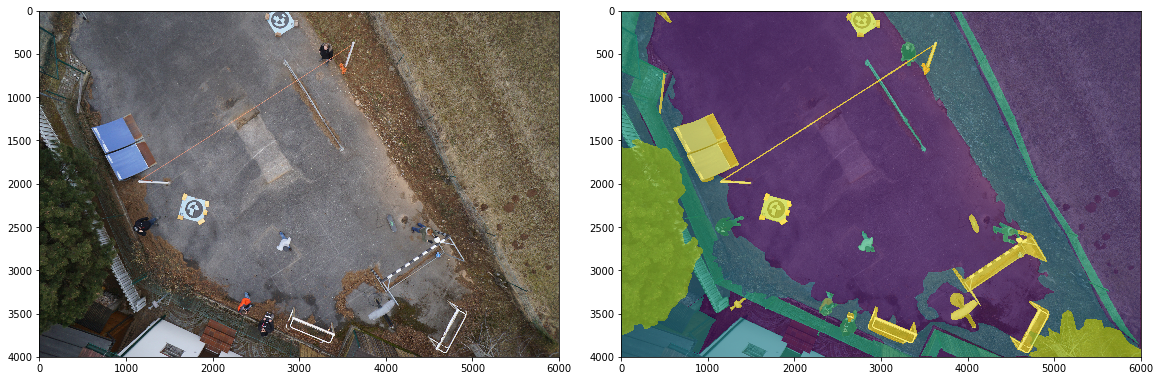

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

original_image = "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/001.jpg"
label_image_semantic = "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/001.png"

fig, axs = plt.subplots(1,2, figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
# axs.grid(False)

label_image_semantic = Image.open(label_image_semantic)
axs[1].imshow( Image.open(original_image))
# label_image_semantic = np.asarray(label_image_semantic)
axs[1].imshow(label_image_semantic,alpha = 0.6)
# axs[1].grid(False)

model_name	Base Model	Segmentation Model
fcn_8	Vanilla CNN	FCN8
fcn_32	Vanilla CNN	FCN8
fcn_8_vgg	VGG 16	FCN8
fcn_32_vgg	VGG 16	FCN32
fcn_8_resnet50	Resnet-50	FCN32
fcn_32_resnet50	Resnet-50	FCN32
fcn_8_mobilenet	MobileNet	FCN32
fcn_32_mobilenet	MobileNet	FCN32
pspnet	Vanilla CNN	PSPNet
vgg_pspnet	VGG 16	PSPNet
resnet50_pspnet	Resnet-50	PSPNet
unet_mini	Vanilla Mini CNN	U-Net
unet	Vanilla CNN	U-Net
vgg_unet	VGG 16	U-Net
resnet50_unet	Resnet-50	U-Net
mobilenet_unet	MobileNet	U-Net
segnet	Vanilla CNN	Segnet
vgg_segnet	VGG 16	Segnet
resnet50_segnet	Resnet-50	Segnet
mobilenet_segnet	MobileNet	Segnet

In [3]:
!pip install keras-segmentation

     |████████████████████████████████| 3.3 MB 874 kB/s 
     |████████████████████████████████| 753 kB 40.5 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29072 sha256=0587b41831e587dd3077a4121d8368d5047f29dbf427a1578953126540255d49
  Stored in directory: /root/.cache/pip/wheels/9c/c6/06/1af941e410edfca83a7c568123a136263351cbecc34a3b3653
Successfully built keras-segmentation
ERROR: albumentations 0.4.3 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Attempting uninstall: imageio
    Found existing installation: imageio 2.6.1
    Uninstalling imageio-2.6.1:
      Successfully uninstalled imageio-2.6.1
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.6
    Uninstalling imgaug-0.2.6:
      Successfully uninstalled imgaug-0.2.6


In [4]:
from keras_segmentation.models.unet import resnet50_unet

n_classes = 23 # Aerial Semantic Segmentation Drone Dataset tree, gras, other vegetation, dirt, gravel, rocks, water, paved area, pool, person, dog, car, bicycle, roof, wall, fence, fence-pole, window, door, obstacle
model = resnet50_unet(n_classes=n_classes ,  input_height=768, input_width=1152)
epochs = 10
model.train( 
    train_images =  "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/",
    train_annotations = "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/",
    checkpoints_path = "resnet50_unet" , epochs=epochs)

Using TensorFlow backend.


94658560/94653016 [==============================] - 2s 0us/step
Verifying training dataset


100%|██████████| 400/400 [05:27<00:00,  1.22it/s]


Dataset verified! 
Epoch 1/10
512/512 [==============================] - 853s 2s/step - loss: 1.2975 - accuracy: 0.6460
saved  resnet50_unet.0
Epoch 2/10
512/512 [==============================] - 831s 2s/step - loss: 0.7362 - accuracy: 0.7779
saved  resnet50_unet.1
Epoch 3/10
512/512 [==============================] - 831s 2s/step - loss: 0.5134 - accuracy: 0.8463
saved  resnet50_unet.2
Epoch 4/10
512/512 [==============================] - 831s 2s/step - loss: 0.3964 - accuracy: 0.8849
saved  resnet50_unet.3
Epoch 5/10
512/512 [==============================] - 834s 2s/step - loss: 0.3333 - accuracy: 0.9047
saved  resnet50_unet.4
Epoch 6/10
512/512 [==============================] - 838s 2s/step - loss: 0.2333 - accuracy: 0.9327
saved  resnet50_unet.5
Epoch 7/10
512/512 [==============================] - 836s 2s/step - loss: 0.1873 - accuracy: 0.9450
saved  resnet50_unet.6
Epoch 8/10
512/512 [==============================] - 835s 2s/step - loss: 0.1528 - accuracy: 0.9546
saved  resne

### Prediction

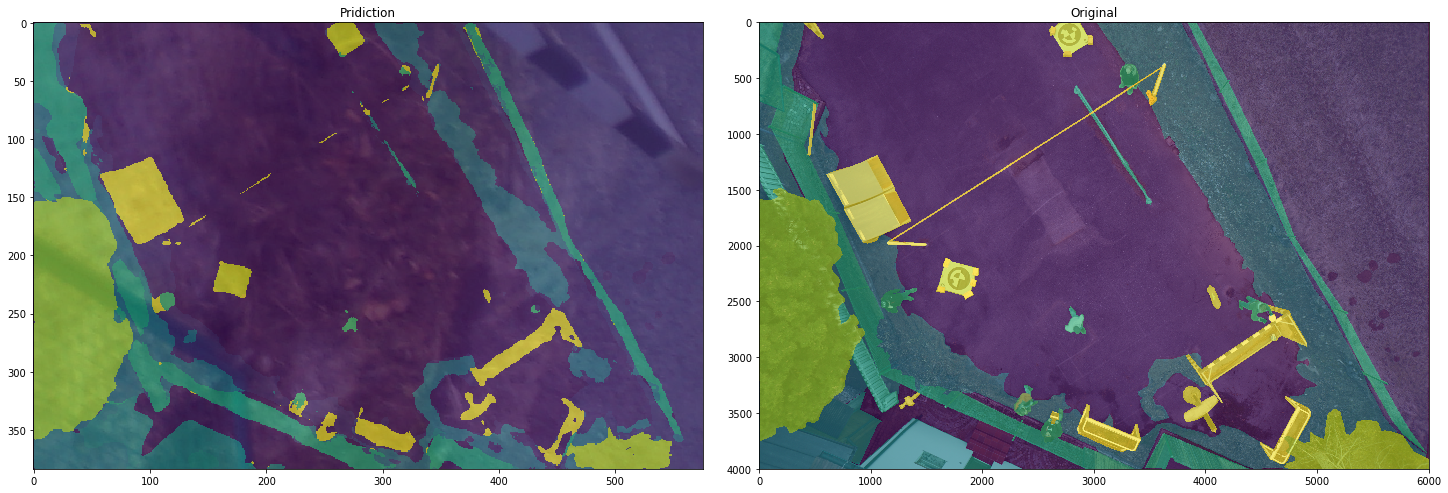

In [5]:
import time
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

start = time.time()

input_image = "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/001.jpg"
out = model.predict_segmentation(
    inp=input_image,
    out_fname="out.png"
)

fig, axs = plt.subplots(1, 2, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('Pridiction')
axs[0].grid(False)
axs[0].imshow(out,alpha = 0.6)


validation_image = "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/001.png"

axs[1].imshow(img_orig)
axs[1].imshow( Image.open(validation_image),alpha = 0.6)
axs[1].set_title('Original')
axs[1].grid(False)

done = time.time()
elapsed = done - start

In [6]:
print(elapsed)
print(out)
print(out.shape)

5.565284729003906
[[ 0  0  0 ...  0  0  0]
 [ 0  1 13 ...  3  3  3]
 [ 0 13 13 ...  3  3  3]
 ...
 [ 0  9  9 ...  3  3  3]
 [ 0  9  9 ...  3  3  3]
 [ 0  1  9 ...  3  3  3]]
(384, 576)


In [7]:
from keras.models import load_model
model.save('drone_segmentation_resnet50_unet.h5')